# Students Performance Linear Regression

I will use the Student_Performance dataset as an exercise to practice the Linear Regression chapter of the Book Hands-on Machine Learning with Scikit-learn, Keras, and Tensorflow. The idea is to replicate the same principles and practices that the autor used with the California Housing dataset and master the content of the chapter.

### Initial imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import urllib.request

### Downloading and Loading the Data

This is a new approach to me than just manually going to the online data source and manually dowloading it.
I still need to study the technique better. 
The code below has a slight difference to the code in the book. In the book the autor first downloads a compressed tgz file, extracts it and only then loads it. Here the file is directly downloaded as csv file and loaded in the notebook. That was now achieved with the use of Chatgpt because I want to focus on learning and practicing the machine learning part.

I want to understand how to use the same approach on other sources and platforms different than github.

In [3]:
STUDENT_PATH = os.path.join("datasets", "student")
STUDENT_URL = "https://raw.githubusercontent.com/Ola76/Student_Performance/main/Student_Performance.csv"

In [4]:
def fetch_student_data(student_url=STUDENT_URL, student_path=STUDENT_PATH):
    os.makedirs(student_path, exist_ok=True)
    csv_path = os.path.join(student_path, "Student_Performance.csv")
    urllib.request.urlretrieve(student_url, csv_path)

def load_student_data(student_path=STUDENT_PATH):
    csv_path = os.path.join(student_path, "Student_Performance.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_student_data()
students = load_student_data()

### Checking the Data

In [6]:
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


###### Change categorical values to numerical

Linear regression only deals with numerical values, I will replace the Yes and No in the Extracurricular Activities column for 1 and 0 respectively using the map function.

In [7]:
students['Extracurricular Activities'] = students['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


###### Comment ---
The data is pretty much clean and ready to the model as it is artificial data created for learning purposes.

In [9]:
students.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


###### Comment ---
Apparently there's no outliers as well.

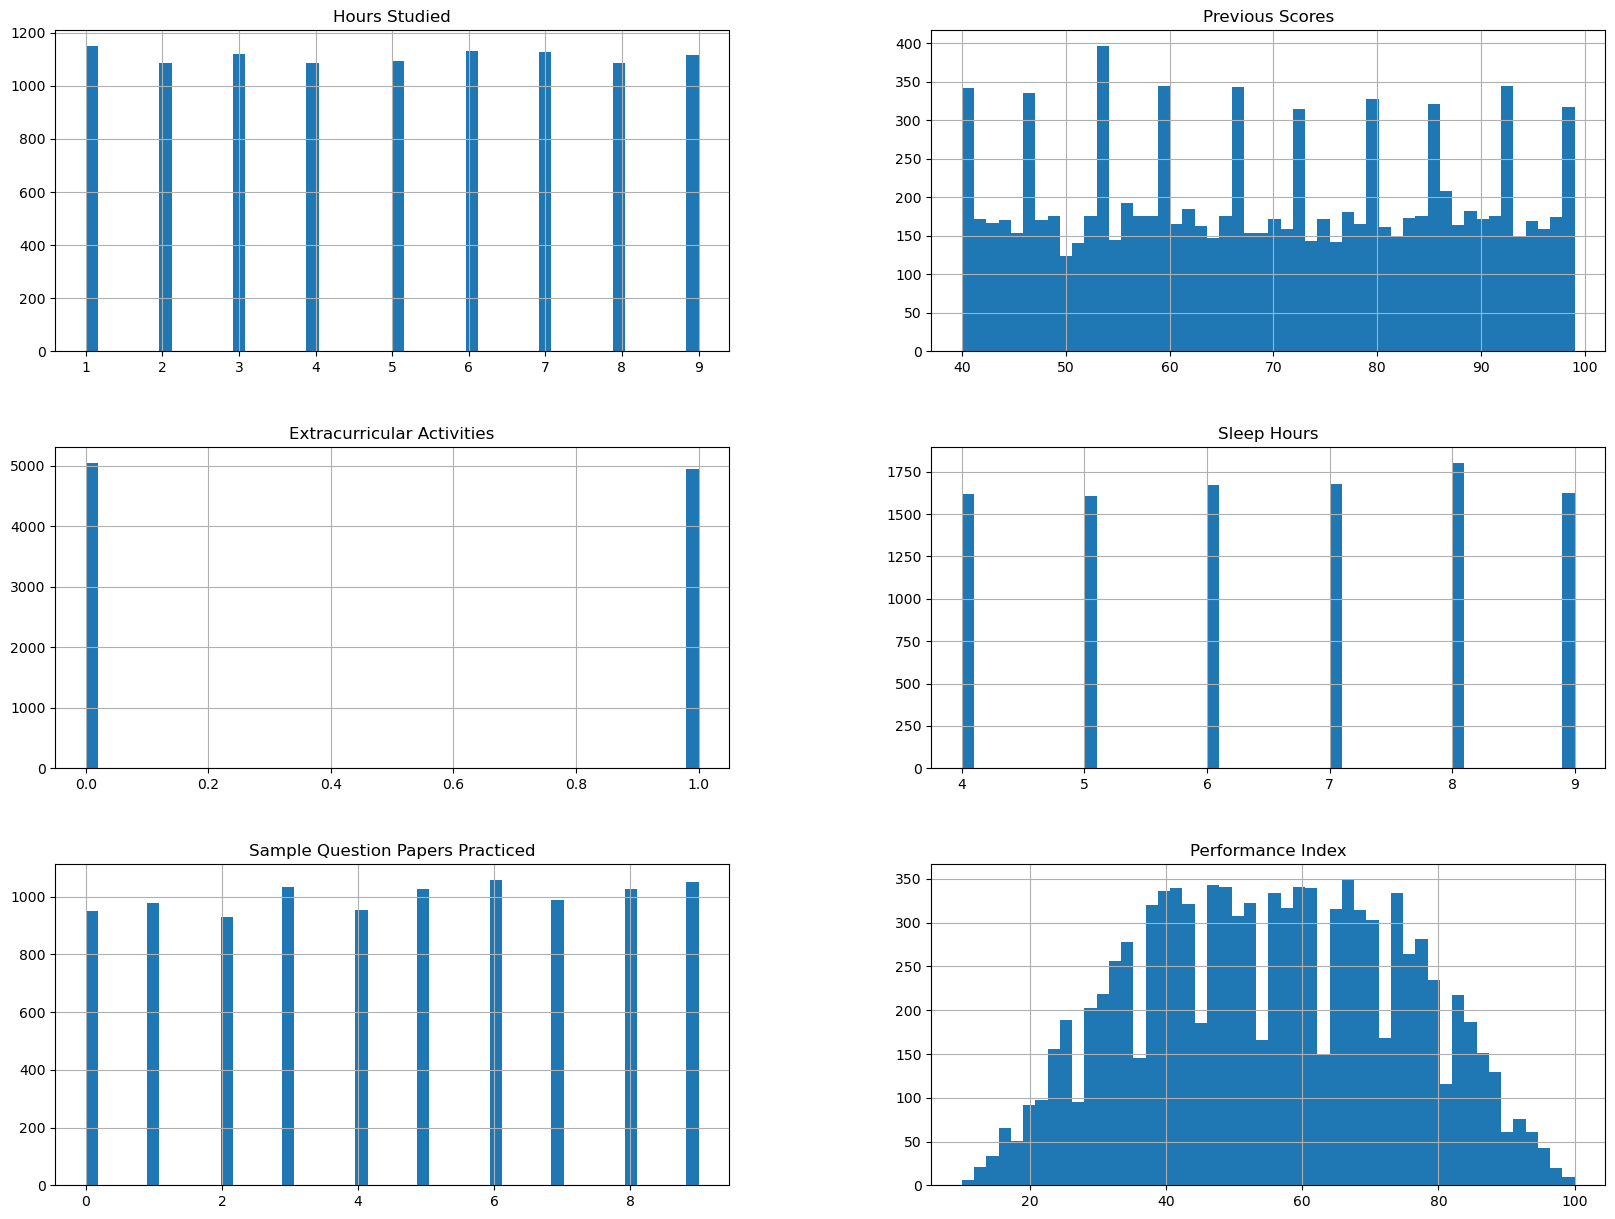

In [10]:
students.hist(bins=50, figsize=(20,15))
plt.show()

The distribuition also looks pretty artificial and there isn't much to highlight here.

### Spliting the Data into Train and Test Sets

Until then I had learned and saw algorithms that would only separate train and test sets after dividing labels and target variables, but according to the author of the book:

    "your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the    test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected. This is called data snooping bias."

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_set, test_set = train_test_split(students, test_size=0.2, random_state=42)

### Visualize the Data

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

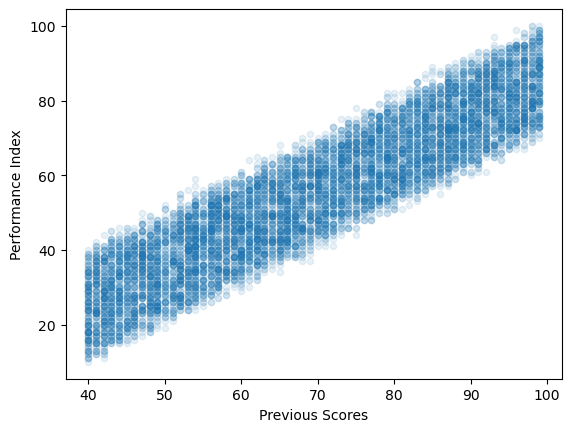

In [13]:
students.plot(kind="scatter", x="Previous Scores", y="Performance Index", alpha=0.1)

###### Comment ---
Again it's possible to visualize how the data is artificial.

### Looking for Correlations

In [14]:
corr_matrix = students.corr()

In [15]:
corr_matrix['Performance Index'].sort_values(ascending=False)

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64

## Training and Evaluating on the Training Set

In [16]:
X = train_set.drop('Performance Index', axis=1)
y = train_set['Performance Index'].copy()

### Using the LinearRegression Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

###### Testing in some instances

In [19]:
some_data = X.iloc[:5]
some_labels = y.iloc[:5]
print('Predictions:', lin_reg.predict(some_data))

Predictions: [34.47064278 25.69665091 57.88131903 21.61795914 40.98884393]


In [20]:
print('Labels:', list(some_labels))

Labels: [36.0, 25.0, 59.0, 22.0, 40.0]


### Evaluating with the Root Mean Squared Error (RMSE)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
students_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y,students_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.0419931071198567

###### Comment ---
For a Performance Index that varies from 10 to 100, 2.04 seems to be a pretty good result.

### Using the DecisionTreeRegressor Model

I've got a good result but let's see if it's possible to improve it even more, using a more powerful model?

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor()

In [25]:
students_predictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y,students_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5063348694293136

###### Comment ---
The result improved a lot, from 2.14 to 0.5 RMSE. This is very good but we need to make sure that this is not result of the model overfitting the data.

### Evaluating with Cross Validation

Let's use the Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X, y,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [28]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standart Deviation', scores.std())
    
display_scores(tree_rmse_scores)

Scores: [2.97897144 3.0701407  3.0580211  3.00575836 3.04555117 3.0018455
 3.01896781 3.03526152 2.98966971 2.98464822]
Mean: 3.0188835537782763
Standart Deviation 0.03036362689396456


###### Comment ---
The result in the cross validation test is much worse than the RMSE on the test set, indicating overfitting of the model.
It Also performed worse than the Linear Regression model in the test set validation.

In [29]:
lin_scores = cross_val_score(lin_reg, X, y,
                         scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.99578363 2.0921871  2.14086567 2.00615157 2.01252929 2.02195122
 2.02663764 2.1085547  2.07638708 1.95346227]
Mean: 2.043451016805501
Standart Deviation 0.0553629662718064


###### Comment ---
Confirmed! The Linear Regression performs much better than the Regression Tree method, the cross validation result is practically the same as in the training set RMSE validation.

### Usin the RandomForestRegressor Model

Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further.

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

RandomForestRegressor()

In [32]:
forest_scores = cross_val_score(forest_reg, X, y,
                         scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.30234497 2.39352628 2.43684651 2.31950145 2.26945182 2.35161842
 2.3714918  2.37773269 2.3624993  2.30346103]
Mean: 2.3488474263277395
Standart Deviation 0.04761141505564305


### Choosing and Saving a Model

The best performing model is really the Linear Regression. This is probably due to the characteristics of the artificial data as more complex models like the decision tree and the decision forest deal better with complex nonlinear relationships.

I will use the joblib library to save our best chosen model.

In [33]:
import joblib

In [34]:
joblib.dump(lin_reg, 'lin_reg.pkl')

['lin_reg.pkl']

### Evaluate on the Test Set

In [47]:
X_test = test_set.drop('Performance Index', axis=1)
y_test = test_set['Performance Index'].copy()

In [48]:
final_predictions = lin_reg.predict(X_test)

In [50]:
final_mse = mean_squared_error(y_test, final_predictions) 
final_rmse = np.sqrt(final_mse)
final_rmse

2.0205515085050063

In [51]:
students.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')